In [177]:
%matplotlib inline
import os

GIMME_DIR = "/Volumes/WorkDrive/gimmeSAD"
SIMOUT_DIR = os.path.join(GIMME_DIR, "simout/")

os.chdir(GIMME_DIR)
import implicit_BI
import gimmeSAD
import numpy as np
import matplotlib.pyplot as plt
import itertools


In [185]:
def load_pidxy(filename):
    with open(filename) as infile:
        dat = []
        while True:
            next_n_lines = list(itertools.islice(infile, 12))
            if not next_n_lines:
                break
            lines = [list(x.strip("[").strip("]\n").split()) for x in next_n_lines[1:-1]]
            lines = list(itertools.chain.from_iterable([ map(int, x) for x in lines]))
            dat.append(lines)
    #dat = np.array(dat)
    return dat

In [149]:
with open("/Volumes/WorkDrive/gimmeSAD/output/pi_x_dxy.log") as infile:
    dat = []
    while True:
        next_n_lines = list(itertools.islice(infile, 12))
        if not next_n_lines:
            break
        lines = [list(x.strip("[").strip("]\n").split()) for x in next_n_lines[1:-1]]
        lines = list(itertools.chain.from_iterable([ map(int, x) for x in lines]))
        dat.append(lines)
dat = np.array(dat)
print(dat.shape)

[['0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['66', '0', '8', '2', '3', '0', '0', '0', '0', '1'], ['72', '0', '6', '2', '1', '0', '1', '1', '0', '0'], ['22', '0', '1', '1', '0', '1', '0', '0', '0', '0'], ['4', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['1', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['1', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['1', '0', '0', '0', '0', '0', '0', '0', '0', '0']]
[['0', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['52', '8', '0', '0', '1', '0', '0', '0', '0', '0'], ['102', '26', '0', '1', '0', '1', '0', '0', '1', '0'], ['56', '9', '0', '0', '0', '0', '0', '0', '0', '0'], ['19', '10', '0', '0', '0', '0', '0', '0', '0', '1'], ['10', '0', '0', '0', '0', '0', '0', '0', '0', '0'], ['8', '3', '0', '0', '0', '0', '0', '0', '0', '0'], ['4', '1', '0', '0', '0', '0', '0', '0', '0', '0'], ['0', '0', '0', '0', '0', '0', '0', '0', '0', '0'],

In [155]:
from matplotlib.mlab import PCA
print(dat.shape)
res = PCA(np.array(dat.T))

(57, 100)


(57, 100)
explained variance ratio (first two components): [ 0.62286836  0.23778228]


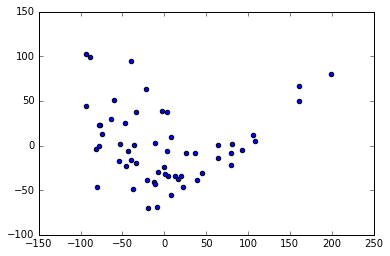

In [174]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print(dat.shape)
pca = PCA(n_components=2)
X_r = pca.fit(dat).transform(dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x, y = zip(*X_r)
plt.scatter(x, y)

## Plot colonization rates

/Volumes/WorkDrive/gimmeSAD/simout/K_10000-C_0.1/pi_x_dxy.log
/Volumes/WorkDrive/gimmeSAD/simout/K_10000-C_0.01/pi_x_dxy.log
/Volumes/WorkDrive/gimmeSAD/simout/K_10000-C_0.001/pi_x_dxy.log
[15, 100, 572]
(687, 100)
explained variance ratio (first two components): [ 0.86623127  0.08679845]
doing 0.1 - red
doing 0.01 - blue
doing 0.001 - yellow


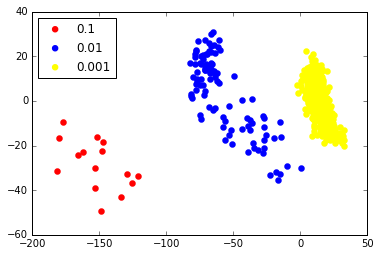

In [214]:
os.chdir(SIMOUT_DIR)
K = [10000, 5000, 1000]
C = [0.1, 0.01, 0.001]
multi_col = ["", "_x4", "_x10"]

dat = []
lens = []
for c in C:
    datfile = os.path.join(SIMOUT_DIR, "K_10000-C_{}/pi_x_dxy.log".format(c))
    print(datfile)
    mydat = load_pidxy(datfile)
    dat.extend(mydat)
    lens.append(len(mydat))
print(lens)
dat = np.array(dat)
print(dat.shape)

pca = PCA(n_components=2)
X_r = pca.fit(dat).transform(dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x,y = zip(*X_r)
cur = 0
for col, idx, size in zip(["red", "blue", "yellow"], lens, C):
    print("doing {} - {}".format(size, col))
    plt.scatter(x[cur:idx+cur], y[cur:idx+cur], color=col, label=size, lw=2)
    cur+=idx
plt.legend(loc='upper left', scatterpoints=1)
plt.show()

## Plot local community sizes

/Volumes/WorkDrive/gimmeSAD/simout/K_10000-C_0.01/pi_x_dxy.log
/Volumes/WorkDrive/gimmeSAD/simout/K_5000-C_0.01/pi_x_dxy.log
/Volumes/WorkDrive/gimmeSAD/simout/K_1000-C_0.01/pi_x_dxy.log
[100, 46, 2]
(148, 100)
explained variance ratio (first two components): [ 0.7633547   0.11368971]
doing 10000 - red
doing 5000 - blue
doing 1000 - yellow


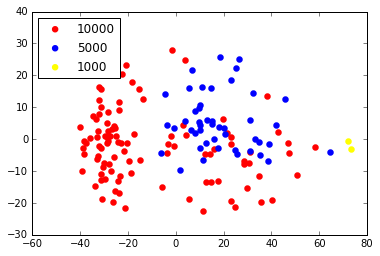

In [219]:
os.chdir(SIMOUT_DIR)
K = [10000, 5000, 1000]
C = [0.1, 0.01, 0.001]
multi_col = ["", "_x4", "_x10"]

dat = []
lens = []
for k in K:
    datfile = os.path.join(SIMOUT_DIR, "K_{}-C_0.01/pi_x_dxy.log".format(k))
    print(datfile)
    mydat = load_pidxy(datfile)
    dat.extend(mydat)
    lens.append(len(mydat))
print(lens)
dat = np.array(dat)
print(dat.shape)

pca = PCA(n_components=2)
X_r = pca.fit(dat).transform(dat)
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))
plt.figure()
x,y = zip(*X_r)
cur = 0
for col, idx, size in zip(["red", "blue", "yellow"], lens, K):
    print("doing {} - {}".format(size, col))
    plt.scatter(x[cur:idx+cur], y[cur:idx+cur], color=col, label=size, lw=2)
    cur+=idx
plt.legend(loc='upper left', scatterpoints=1)
plt.show()